# 探索问题
1、年龄与逃生成功率的相关性

In [161]:
import numpy as np
import pandas as pd
import sys
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
titanic_file_name='titanic-data.csv'
df=pd.read_csv(titanic_file_name)
df_survived=df[df.Survived==1].copy()


大致查看数据的信息

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上述来看，Age、Cabin、Embarked 有信息缺失，Age需要补全数据

使用Age 的平均值来填补缺失值

In [163]:
df.loc[:,'Age'].fillna(value=(df.loc[:,'Age'].mean()),inplace=True)

从表中看，名字，费用，登船地,票号对逃生结果无影响，删除这些列，但保存名字做后续分析
Cabin 的缺失数据很多，所以也删除

In [164]:
df.drop(['Embarked','Fare','Ticket','Cabin'],axis=1,inplace=True)

In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0


主要分析性别与逃生的关系，确定有没有做到lady first


分析相关系数，从结果来看相关系数大于0.3小于0.8 是正相关，大致来看，女性逃生的概率大于男性，下面做详细分析

In [166]:
df['Survived'].corr(df['Sex']=='female')

0.54335138065775523

要排除其它因素影响

计算船上旅客性别的比例

In [167]:
#
# 打印出整条船上的旅客中女性的数量的比例
#
total_female_proportion=(df[df['Sex']=='female']).shape[0]/(df.shape[0])
total_female_proportion

0.35241301907968575

(-1.1135982498635462,
 1.1076137811100177,
 -1.1118283350684617,
 1.1005632874873577)

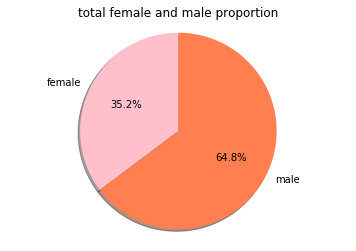

In [168]:
#
# 打印出整条船上的旅客中女性的数量的比例的饼状图
#
labels=['female','male']
colors=["pink","coral"]
data=[total_female_proportion,1-total_female_proportion]
plt.pie(data,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.6)
plt.title('total female and male proportion')

plt.axis('equal')

Text(0.5,1,' female and male surviers proportion')

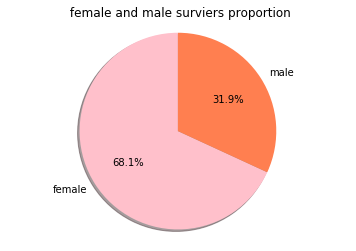

In [169]:
#
# 打印出整幸存者中女性的数量的比例的饼状图
#
survived_female_proportion=(df_survived[df_survived['Sex']=='female']).shape[0]/(df_survived.shape[0])
data=[survived_female_proportion,1-survived_female_proportion]
plt.pie(data,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.6)
plt.axis('equal')
plt.title(' female and male surviers proportion')

# 最后逃生的女性的比例大于 船上旅客中女性的比例 

# 但是不排除这是女性的年龄段，船舱等级等因素造成的，继续分析

In [170]:
#####################################
# comput_proportion                 #
#####################################

## 从 DataFrame 中计算 col_2 对应的每个值占col_1的每个值的比例，返回比例构成的DF
def compute_proportion(df,col_1,col_2):
    unique_value_in_col_1=pd.unique(df.loc[:,col_1])
    unique_value_in_col_2=pd.unique(df.loc[:,col_2])
    proportion_df=pd.DataFrame(index=unique_value_in_col_1,columns=unique_value_in_col_2)
    for i in unique_value_in_col_1:
        for j in unique_value_in_col_2:
            col_1_count=((df[df.loc[:,col_1]==i]).count())['PassengerId']
            #col_2_count_meanwhile_col_1_count=(((df[df.loc[:,col_1]==i]).loc[:,col_2]==j).count())#['PassengerId']
            col_2_count_meanwhile_col_1_count=((df[df.loc[:,col_1]==i])[(df[df.loc[:,col_1]==i]).loc[:,col_2]==j]).count()['PassengerId']
            #print (col_1_count)
            #print ((df[df.loc[:,col_1]==i])[(df[df.loc[:,col_1]==i]).loc[:,col_2]==j])
            #print (col_2_count_meanwhile_col_1_count)
            proportion_df.loc[i,j]=col_2_count_meanwhile_col_1_count/col_1_count
    return proportion_df

In [171]:
#
# 打印出船上每个Pclass中男性和女性的数量的比例
#
df_pclass_sex_proportion=compute_proportion(df,'Pclass','Sex')
df_pclass_sex_proportion=df_pclass_sex_proportion.loc[:,['female','male']] 
df_pclass_sex_proportion

,female,male
3,0.293279,0.706721
1,0.435185,0.564815
2,0.413043,0.586957


In [172]:
#
# 打印出幸存者中每个Pclass中男性和女性的数量的比例
#
df_surveved_pclass_sex_proportion=compute_proportion(df_survived,'Pclass','Sex')
df_surveved_pclass_sex_proportion

,female,male
1,0.669118,0.330882
3,0.605042,0.394958
2,0.804598,0.195402


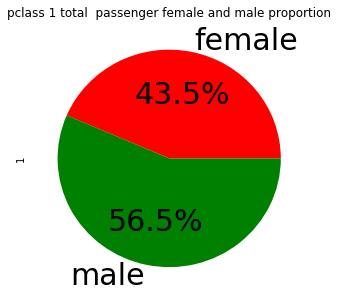

In [173]:
#
# 打印出船上pclass 1 中的旅客女性的数量的比例的饼状图
#
(df_pclass_sex_proportion.loc[1]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 1 total  passenger female and male proportion')

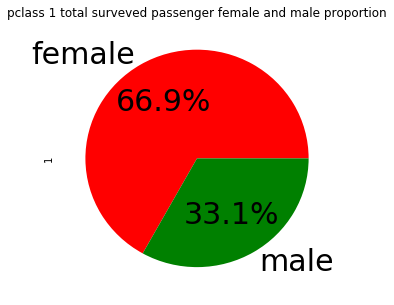

In [174]:
#
# 打印出幸存者中pclass 1 中的旅客女性的数量的比例的饼状图
#
(df_surveved_pclass_sex_proportion.loc[1]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 1 total surveved passenger female and male proportion')

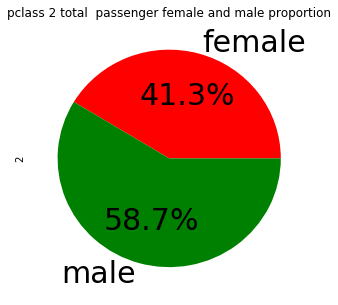

In [175]:
#
# 打印出船上pclass 2 中的旅客女性的数量的比例的饼状图
#
(df_pclass_sex_proportion.loc[2]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 2 total  passenger female and male proportion')

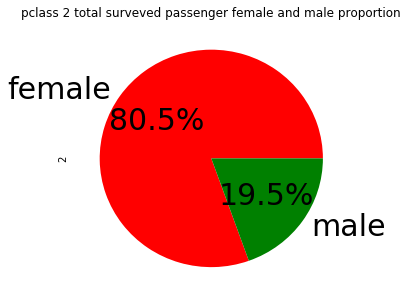

In [176]:
#
# 打印出幸存者中pclass 2 中的旅客女性的数量的比例的饼状图
#
(df_surveved_pclass_sex_proportion.loc[2]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 2 total surveved passenger female and male proportion')

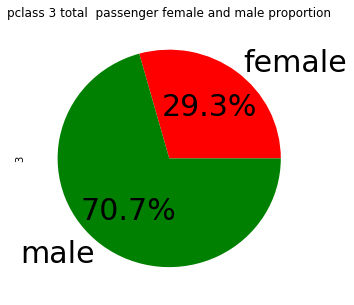

In [177]:
#
# 打印出船上pclass 3 中的旅客女性的数量的比例的饼状图
#
(df_pclass_sex_proportion.loc[3]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 3 total  passenger female and male proportion')

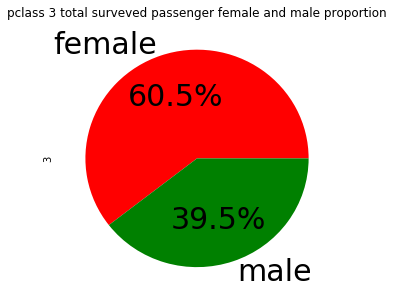

In [178]:
#
# 打印出幸存者中pclass 3 中的旅客女性的数量的比例的饼状图
#
(df_surveved_pclass_sex_proportion.loc[3]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 3 total surveved passenger female and male proportion')

# 从结果来看三个等级的船舱中，登船旅客中女性的比例都要少于男性，但是幸存者中 三个船舱的女性幸存者的比例都要高于男性

下面继续分析年龄是否对我们的分析造成了干扰

In [179]:
#
# 在CSV data中增加age_group 
#对于14岁以下，50岁以上 逃生时明显需要成年人(adult)帮助
#
df['age_group']='child'
df_survived['age_group']='child'

In [180]:
#####################################
# convert_age_group                 #
#####################################
#
## 计算 age 对应的age_group
#
def convert_age_group(age):
    if(age<=14):
        return 'child'
    if(age<=50):
        return 'adult'
    else:
        return 'senior citizen'

In [181]:
#####################################
# convert_age                 #
#####################################
#
## 从 DataFrame 中计算 age 对应的age_group,返回age_group series
#
def convert_age(age_group):
    return age_group.map(convert_age_group)

In [182]:
#
# 将DataFrame 中的Age 列 映射到 age_group列
#
df['age_group']=convert_age(df['Age'])
df_survived['age_group']=convert_age(df['Age'])

In [183]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,adult


# 先看Pclass==1

In [184]:
#
# 打印出船上pclass 1 中各年龄段中性别的比例
#
df_pclass_1_agegroup_sexual_proportion=compute_proportion(df[df.Pclass==1],'age_group','Sex')
df_pclass_1_agegroup_sexual_proportion

,female,male
adult,0.459302,0.540698
senior citizen,0.333333,0.666667
child,0.4,0.6


In [185]:
#
# 打印出幸存者中pclass 1 中各年龄段中性别的比例
#
df_pclass_1_surviver_agegroup_sexual_proportion=compute_proportion(df_survived[df_survived.Pclass==1],'age_group','Sex')
df_pclass_1_surviver_agegroup_sexual_proportion

,female,male
adult,0.675439,0.324561
senior citizen,0.722222,0.277778
child,0.25,0.75


Text(0.5,1,'pclass_1_female_proportion')

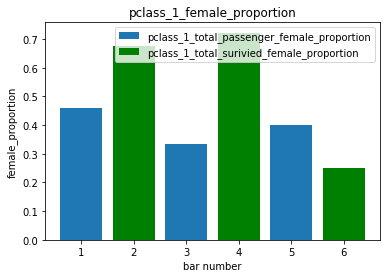

In [186]:
#
# 打印出pclass 1 中幸存者与整体旅客 中 女性逃生的比例的柱状图对比
#
plt.bar([1,3,5],list(df_pclass_1_agegroup_sexual_proportion.loc[:,'female']), label="pclass_1_total_passenger_female_proportion")
plt.bar([2,4,6],list(df_pclass_1_surviver_agegroup_sexual_proportion.loc[:,'female']), label="pclass_1_total_surivied_female_proportion", color='g')
plt.legend()
plt.xlabel('bar number')
plt.ylabel('female_proportion')
plt.title('pclass_1_female_proportion')

从上边两个表中来看，adult 和 senior citizen 都和之前的分析吻合 ,幸存者中女性的比例都比所有旅客中的女性比例要高

child却不同下面分析Pclass中的child

In [187]:
#
# 打印出旅客中pclass 1 中child的逃生情况
#
df_child=df[df.age_group=='child']
df_child_pclass_1=df_child[df_child.Pclass==1]
df_child_pclass_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,age_group
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,child
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,child
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,child
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,child
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,child


从结果来看，因为child的样本数比较小，而且存活率为80%，唯一一个去世的child 为female，
所以才导致了在Pclass ==1中 child 里 female的幸存都比例的降低

# Pclass==2

In [188]:
#
# 打印出船上pclass 2 中各年龄段中性别的比例
#
df_pclass_2_agegroup_sexual_proportion=compute_proportion(df[df.Pclass==2],'age_group','Sex')
df_pclass_2_agegroup_sexual_proportion

,female,male
child,0.526316,0.473684
senior citizen,0.2,0.8
adult,0.42,0.58


In [189]:
#
# 打印出幸存者中pclass 2 中各年龄段中性别的比例
#
df_pclass_2_surviver_agegroup_sexual_proportion=compute_proportion(df_survived[df_survived.Pclass==2],'age_group','Sex')
df_pclass_2_surviver_agegroup_sexual_proportion

,female,male
child,0.526316,0.473684
senior citizen,0.666667,0.333333
adult,0.892308,0.107692


Text(0.5,1,'pclass_2_female_proportion')

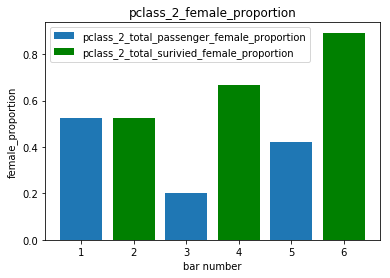

In [190]:
#
# 打印出pclass 2 中幸存者与整体旅客 中 女性逃生的比例的柱状图对比
#
plt.bar([1,3,5],list(df_pclass_2_agegroup_sexual_proportion.loc[:,'female']), label="pclass_2_total_passenger_female_proportion")
plt.bar([2,4,6],list(df_pclass_2_surviver_agegroup_sexual_proportion.loc[:,'female']), label="pclass_2_total_surivied_female_proportion", color='g')
plt.legend()
plt.xlabel('bar number')
plt.ylabel('female_proportion')
plt.title('pclass_2_female_proportion')

pclass 2中的 幸存者中的女性幸存者的比例 也要高于原pclass 3 中整体旅客中各年龄段的女性比例

Pclass==2 中旅客和幸存者中  child 的性别的比例是一样的，我们打印出来观察一下

In [191]:
#
# 打印出旅客中pclass 2 中child的逃生情况
#
df_child_pclass_2=df_child[df_child.Pclass==2]
df_child_pclass_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,age_group
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,child
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,child
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,child
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,child
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,child
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,child
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.00,0,2,child
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,child
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,child
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,child


awesome!!! 所以的child都幸存了！！

# Pclass==3

In [192]:
#
# 打印出船上pclass 3 中各年龄段中性别的比例
#
df_pclass_3_agegroup_sexual_proportion=compute_proportion(df[df.Pclass==3],'age_group','Sex')
df_pclass_3_agegroup_sexual_proportion

,male,female
adult,0.726636,0.273364
child,0.509434,0.490566
senior citizen,0.9,0.1


In [193]:
#
# 打印出幸存者中pclass 3 中各年龄段中性别的比例
#
df_pclass_3_surviver_agegroup_sexual_proportion=compute_proportion(df_survived[df_survived.Pclass==3],'age_group','Sex')
df_pclass_3_surviver_agegroup_sexual_proportion

,female,male
adult,0.604167,0.395833
child,0.590909,0.409091
senior citizen,1,0


Text(0.5,1,'pclass_3_female_proportion')

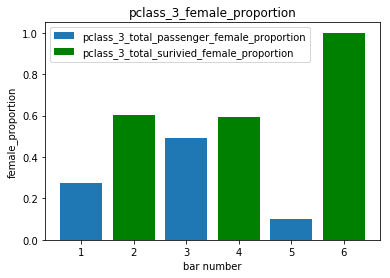

In [194]:
#
# 打印出pclass 3 中幸存者与整体旅客 中 女性逃生的比例的柱状图对比
#
plt.bar([1,3,5],list(df_pclass_3_agegroup_sexual_proportion.loc[:,'female']), label="pclass_3_total_passenger_female_proportion")
plt.bar([2,4,6],list(df_pclass_3_surviver_agegroup_sexual_proportion.loc[:,'female']), label="pclass_3_total_surivied_female_proportion", color='g')
plt.legend()
plt.xlabel('bar number')
plt.ylabel('female_proportion')
plt.title('pclass_3_female_proportion')

pclass 3中的 幸存者中的女性幸存者的比例 也要高于原pclass 3 中整体旅客中的女性比例

# 所以综合以上分析，我们可以得到结论，在轮船沉没过程时，登上救生艇的过程中确实做到了女性优先

# 以上分析只表明性别因素对逃生的成功率有影响，非常有可能存在其它因素，比如船舱的位置离救生船的距离，女性旅客基本上都是以家庭为单位旅行 等其它因素